# Generating images

This notebook is a example of how to generate images from a miriad file.
In order to generate an image, we need to convert the miriad file to measurement so that we can feed into CASA and generate and image.

In [1]:
%matplotlib notebook
from beam_solver import imaging as im
from beam_solver import uv_convert as uc
import numpy as np
import glob
import pylab
import os

## Convert miriad to ms 

In [2]:
#miriad file
uvfile = '/Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS'

In [3]:
#converting miriad file to msfile
uvc = uc.UVConvert(uvfile)
uvc.convert_uv(clobber=True)

Phasing visibilities to 2458115.2411545515
Converting /Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS to /Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS.uvfits
Converting /Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS.uvfits to /Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS.ms
CMD: casa --nologger --nologfile --nogui -c uvfits2ms.py


## Generate image

In [4]:
# path to msfile
msfile = '/Users/Ridhima/Documents/ucb_projects/beam_characterization/hera_data/zen.2458115.23736.xx.HH.uvOCRS.ms'

In [5]:
img = im.Imaging(msfile)
imagename = '2458115.23736.xx'
# generating image
img.generate_image(imagename, niter=1000)

Imaging using antenna(s) all
CMD: casa --nologger --nologfile --nogui -c clean.py


In [7]:
# convert casa image to fits format
img.to_fits(imagename)

CMD: casa --nologger --nologfile --nogui -c to_fits.py


<IPython.core.display.Javascript object>


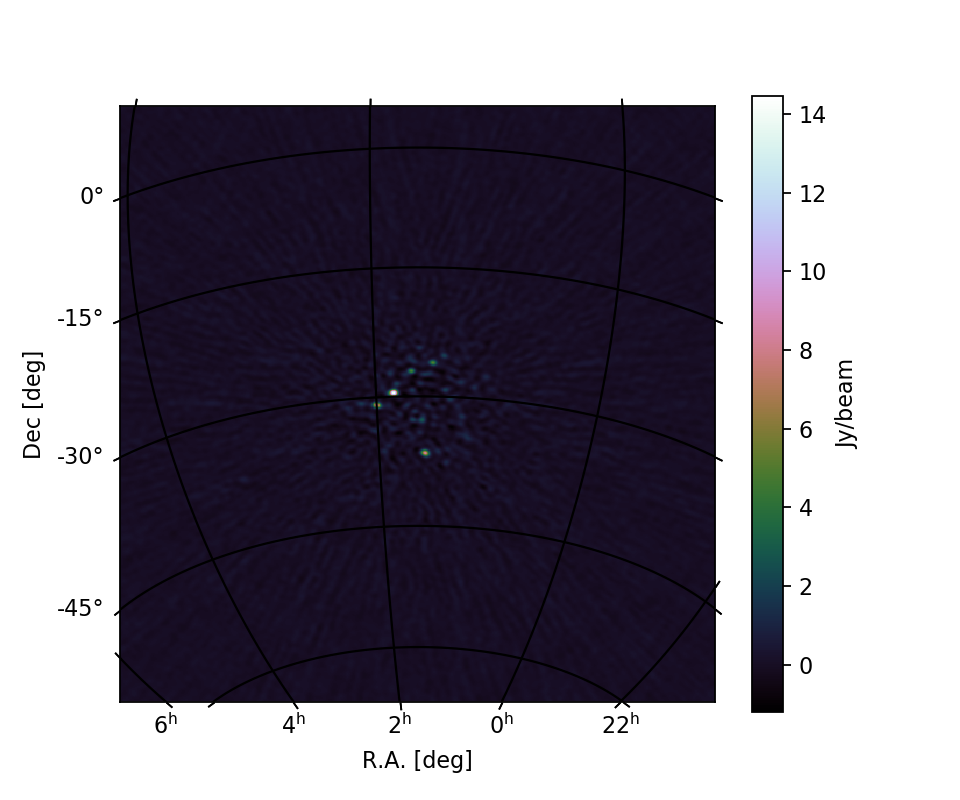

In [8]:
fitsfile = '2458115.23736.xx.fits'
img.plot_image(fitsfile, cmap='cubehelix')

## Subtracting CLEAN components from data 

In [9]:
resmsfile = msfile.replace('.ms', '.res.ms')
img.subtract_model(outfile=resmsfile)
rimagename = '2458115.23736.xx.res'

CMD::  casa --nologger --nogui --nologfile  -c subtract_mod.py


In [10]:
#generating residual image
imgr = im.Imaging(resmsfile)
imgr.generate_image(rimagename, niter=0)

Imaging using antenna(s) all
CMD: casa --nologger --nologfile --nogui -c clean.py


In [21]:
imgr.to_fits(rimagename)

CMD: casa --nologger --nologfile --nogui -c exportfits.py


<IPython.core.display.Javascript object>


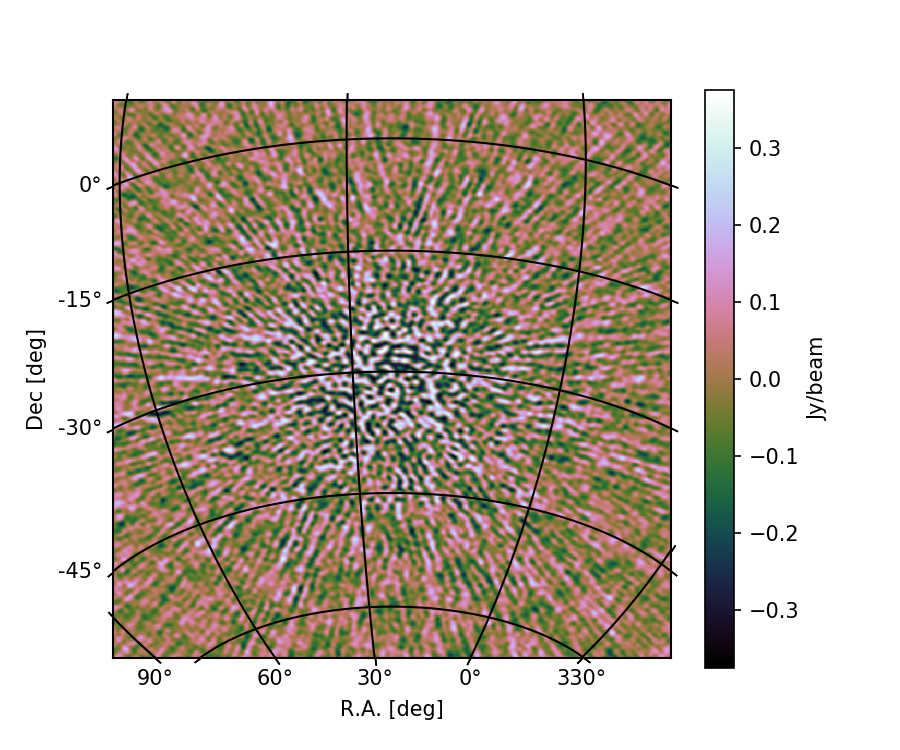

In [23]:
rfitsfile = '2458115.23736.xx.res.fits'
imgr.plot_image(rfitsfile, cmap='cubehelix')